In [4]:
import os 
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform
import folium
import json

AttributeError: partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)

In [5]:
!pip show folium

Name: folium
Version: 0.14.0
Summary: Make beautiful maps with Leaflet.js & Python
Home-page: https://github.com/python-visualization/folium
Author: Rob Story
Author-email: wrobstory@gmail.com
License: MIT
Location: c:\users\bleudrake\anaconda3\envs\gj_django\lib\site-packages
Requires: branca, jinja2, numpy, requests
Required-by: 


In [ ]:
import pandas as pd

In [ ]:
if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False

In [ ]:
# 엑셀 파일 경로 설정
excel_file = 'sprint2_base/행정구역별__인구수.xlsx'

# 엑셀 파일에서 시트를 불러오기
locpeople_df = pd.read_excel(excel_file)

# 불러온 데이터 출력
print(locpeople_df)

         행정구역별      2007      2008      2009      2010      2011        2012   
0   행정구역(시군구)별       NaN       NaN       NaN       NaN       NaN         NaN  \
1           전국  49268928  49540367  49773145  50515666  50734284  50948272.0   
2          서울시  10192710  10200827  10208302  10312545  10249679  10195318.0   
3          부산시   3587439   3564577   3543030   3567910   3550963   3538484.0   
4          대구시   2493261   2492724   2489781   2511676   2507271   2505644.0   
5          인천시   2664576   2692696   2710579   2758296   2801274   2843981.0   
6          광주시   1413444   1422702   1433640   1454636   1463464   1469216.0   
7          대전시   1475659   1480895   1484180   1503664   1515603   1524583.0   
8          울산시   1099995   1112407   1114866   1126298   1135494   1147256.0   
9          세종시         -         -         -         -         -    113117.0   
10         경기도  11106211  11292264  11460610  11786622  11937415  12093299.0   
11         강원도   1503806   1508575   151

In [ ]:
locpeople_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정구역별   19 non-null     object 
 1   2007    18 non-null     object 
 2   2008    18 non-null     object 
 3   2009    18 non-null     object 
 4   2010    18 non-null     object 
 5   2011    18 non-null     object 
 6   2012    18 non-null     float64
 7   2013    18 non-null     float64
 8   2014    18 non-null     float64
 9   2015    18 non-null     float64
 10  2016    18 non-null     float64
 11  2017    18 non-null     float64
 12  2018    18 non-null     float64
 13  2019    18 non-null     float64
 14  2020    18 non-null     float64
 15  2021    18 non-null     float64
 16  2022    18 non-null     float64
dtypes: float64(11), object(6)
memory usage: 2.6+ KB


In [ ]:
# 첫 번째 행 삭제
locpeople_df = locpeople_df.drop(0)

In [ ]:
# 두 번째 행(전국 총 인구) 삭제
locpeople_df = locpeople_df.drop(1)

In [ ]:
locpeople_df

,행정구역별,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,서울시,10192710,10200827,10208302,10312545,10249679,10195318.0,10143645.0,10103233.0,10022181.0,9930616.0,9857426.0,9765623.0,9729107.0,9668465.0,9509458.0,9428372.0
3,부산시,3587439,3564577,3543030,3567910,3550963,3538484.0,3527635.0,3519401.0,3513777.0,3498529.0,3470653.0,3441453.0,3413841.0,3391946.0,3350380.0,3317812.0
4,대구시,2493261,2492724,2489781,2511676,2507271,2505644.0,2501588.0,2493264.0,2487829.0,2484557.0,2475231.0,2461769.0,2438031.0,2418346.0,2385412.0,2363691.0
5,인천시,2664576,2692696,2710579,2758296,2801274,2843981.0,2879782.0,2902608.0,2925815.0,2943069.0,2948542.0,2954642.0,2957026.0,2942828.0,2948375.0,2967314.0
6,광주시,1413444,1422702,1433640,1454636,1463464,1469216.0,1472910.0,1475884.0,1472199.0,1469214.0,1463770.0,1459336.0,1456468.0,1450062.0,1441611.0,1431050.0
7,대전시,1475659,1480895,1484180,1503664,1515603,1524583.0,1532811.0,1531809.0,1518775.0,1514370.0,1502227.0,1489936.0,1474870.0,1463882.0,1452251.0,1446072.0
8,울산시,1099995,1112407,1114866,1126298,1135494,1147256.0,1156480.0,1166377.0,1173534.0,1172304.0,1165132.0,1155623.0,1148019.0,1136017.0,1121592.0,1110663.0
9,세종시,-,-,-,-,-,113117.0,122153.0,156125.0,210884.0,243048.0,280100.0,314126.0,340575.0,355831.0,371895.0,383591.0
10,경기도,11106211,11292264,11460610,11786622,11937415,12093299.0,12234630.0,12357830.0,12522606.0,12716780.0,12873895.0,13077153.0,13239666.0,13427014.0,13565450.0,13589432.0
11,강원도,1503806,1508575,1512870,1529818,1536448,1538630.0,1542263.0,1544442.0,1549507.0,1550806.0,1550142.0,1543052.0,1541502.0,1542840.0,1538492.0,1536498.0


In [ ]:
locpeople_df = pd.DataFrame(locpeople_df)
locpeople_df

,행정구역별,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,서울시,10192710,10200827,10208302,10312545,10249679,10195318.0,10143645.0,10103233.0,10022181.0,9930616.0,9857426.0,9765623.0,9729107.0,9668465.0,9509458.0,9428372.0
3,부산시,3587439,3564577,3543030,3567910,3550963,3538484.0,3527635.0,3519401.0,3513777.0,3498529.0,3470653.0,3441453.0,3413841.0,3391946.0,3350380.0,3317812.0
4,대구시,2493261,2492724,2489781,2511676,2507271,2505644.0,2501588.0,2493264.0,2487829.0,2484557.0,2475231.0,2461769.0,2438031.0,2418346.0,2385412.0,2363691.0
5,인천시,2664576,2692696,2710579,2758296,2801274,2843981.0,2879782.0,2902608.0,2925815.0,2943069.0,2948542.0,2954642.0,2957026.0,2942828.0,2948375.0,2967314.0
6,광주시,1413444,1422702,1433640,1454636,1463464,1469216.0,1472910.0,1475884.0,1472199.0,1469214.0,1463770.0,1459336.0,1456468.0,1450062.0,1441611.0,1431050.0
7,대전시,1475659,1480895,1484180,1503664,1515603,1524583.0,1532811.0,1531809.0,1518775.0,1514370.0,1502227.0,1489936.0,1474870.0,1463882.0,1452251.0,1446072.0
8,울산시,1099995,1112407,1114866,1126298,1135494,1147256.0,1156480.0,1166377.0,1173534.0,1172304.0,1165132.0,1155623.0,1148019.0,1136017.0,1121592.0,1110663.0
9,세종시,-,-,-,-,-,113117.0,122153.0,156125.0,210884.0,243048.0,280100.0,314126.0,340575.0,355831.0,371895.0,383591.0
10,경기도,11106211,11292264,11460610,11786622,11937415,12093299.0,12234630.0,12357830.0,12522606.0,12716780.0,12873895.0,13077153.0,13239666.0,13427014.0,13565450.0,13589432.0
11,강원도,1503806,1508575,1512870,1529818,1536448,1538630.0,1542263.0,1544442.0,1549507.0,1550806.0,1550142.0,1543052.0,1541502.0,1542840.0,1538492.0,1536498.0


In [ ]:
locpeople_df = locpeople_df.T

In [ ]:
locpeople_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 행정구역별 to 2022
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2       17 non-null     object
 1   3       17 non-null     object
 2   4       17 non-null     object
 3   5       17 non-null     object
 4   6       17 non-null     object
 5   7       17 non-null     object
 6   8       17 non-null     object
 7   9       17 non-null     object
 8   10      17 non-null     object
 9   11      17 non-null     object
 10  12      17 non-null     object
 11  13      17 non-null     object
 12  14      17 non-null     object
 13  15      17 non-null     object
 14  16      17 non-null     object
 15  17      17 non-null     object
 16  18      17 non-null     object
dtypes: object(17)
memory usage: 2.9+ KB


In [ ]:
locpeople_df = locpeople_df.rename(columns={'행정구역별': '연도'})

In [ ]:
locpeople_df

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
행정구역별,서울시,부산시,대구시,인천시,광주시,대전시,울산시,세종시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
2007,10192710,3587439,2493261,2664576,1413444,1475659,1099995,-,11106211,1503806,1506608,1995531,1862277,1929836,2681364,3196953,559258
2008,10200827,3564577,2492724,2692696,1422702,1480895,1112407,-,11292264,1508575,1519587,2018537,1855772,1919000,2673931,3225255,560618
2009,10208302,3543030,2489781,2710579,1433640,1484180,1114866,-,11460610,1512870,1527478,2037582,1854508,1913004,2669876,3250176,562663
2010,10312545,3567910,2511676,2758296,1454636,1503664,1126298,-,11786622,1529818,1549528,2075514,1868963,1918485,2689920,3290536,571255
2011,10249679,3550963,2507271,2801274,1463464,1515603,1135494,-,11937415,1536448,1562903,2101284,1874031,1914339,2699195,3308765,576156
2012,10195318.0,3538484.0,2505644.0,2843981.0,1469216.0,1524583.0,1147256.0,113117.0,12093299.0,1538630.0,1565628.0,2028777.0,1873341.0,1909618.0,2698353.0,3319314.0,583713.0
2013,10143645.0,3527635.0,2501588.0,2879782.0,1472910.0,1532811.0,1156480.0,122153.0,12234630.0,1542263.0,1572732.0,2047631.0,1872965.0,1907172.0,2699440.0,3333820.0,593806.0
2014,10103233.0,3519401.0,2493264.0,2902608.0,1475884.0,1531809.0,1166377.0,156125.0,12357830.0,1544442.0,1578933.0,2062273.0,1871560.0,1905780.0,2700794.0,3350257.0,607346.0
2015,10022181.0,3513777.0,2487829.0,2925815.0,1472199.0,1518775.0,1173534.0,210884.0,12522606.0,1549507.0,1583952.0,2077649.0,1869711.0,1908996.0,2702826.0,3364702.0,624395.0


In [ ]:
locpeople_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 행정구역별 to 2022
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2       17 non-null     object
 1   3       17 non-null     object
 2   4       17 non-null     object
 3   5       17 non-null     object
 4   6       17 non-null     object
 5   7       17 non-null     object
 6   8       17 non-null     object
 7   9       17 non-null     object
 8   10      17 non-null     object
 9   11      17 non-null     object
 10  12      17 non-null     object
 11  13      17 non-null     object
 12  14      17 non-null     object
 13  15      17 non-null     object
 14  16      17 non-null     object
 15  17      17 non-null     object
 16  18      17 non-null     object
dtypes: object(17)
memory usage: 2.9+ KB


In [ ]:
locpeople_df.columns=['서울시','부산시','대구시','인천시','광주시', '대전시', '울산시', '세종시', 
                       '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주도']

In [ ]:
locpeople_df

,서울시,부산시,대구시,인천시,광주시,대전시,울산시,세종시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
행정구역별,서울시,부산시,대구시,인천시,광주시,대전시,울산시,세종시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
2007,10192710,3587439,2493261,2664576,1413444,1475659,1099995,-,11106211,1503806,1506608,1995531,1862277,1929836,2681364,3196953,559258
2008,10200827,3564577,2492724,2692696,1422702,1480895,1112407,-,11292264,1508575,1519587,2018537,1855772,1919000,2673931,3225255,560618
2009,10208302,3543030,2489781,2710579,1433640,1484180,1114866,-,11460610,1512870,1527478,2037582,1854508,1913004,2669876,3250176,562663
2010,10312545,3567910,2511676,2758296,1454636,1503664,1126298,-,11786622,1529818,1549528,2075514,1868963,1918485,2689920,3290536,571255
2011,10249679,3550963,2507271,2801274,1463464,1515603,1135494,-,11937415,1536448,1562903,2101284,1874031,1914339,2699195,3308765,576156
2012,10195318.0,3538484.0,2505644.0,2843981.0,1469216.0,1524583.0,1147256.0,113117.0,12093299.0,1538630.0,1565628.0,2028777.0,1873341.0,1909618.0,2698353.0,3319314.0,583713.0
2013,10143645.0,3527635.0,2501588.0,2879782.0,1472910.0,1532811.0,1156480.0,122153.0,12234630.0,1542263.0,1572732.0,2047631.0,1872965.0,1907172.0,2699440.0,3333820.0,593806.0
2014,10103233.0,3519401.0,2493264.0,2902608.0,1475884.0,1531809.0,1166377.0,156125.0,12357830.0,1544442.0,1578933.0,2062273.0,1871560.0,1905780.0,2700794.0,3350257.0,607346.0
2015,10022181.0,3513777.0,2487829.0,2925815.0,1472199.0,1518775.0,1173534.0,210884.0,12522606.0,1549507.0,1583952.0,2077649.0,1869711.0,1908996.0,2702826.0,3364702.0,624395.0


In [ ]:
locpeople_df = locpeople_df.drop('행정구역별')

In [ ]:
locpeople_df

,서울시,부산시,대구시,인천시,광주시,대전시,울산시,세종시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
2007,10192710,3587439,2493261,2664576,1413444,1475659,1099995,-,11106211,1503806,1506608,1995531,1862277,1929836,2681364,3196953,559258
2008,10200827,3564577,2492724,2692696,1422702,1480895,1112407,-,11292264,1508575,1519587,2018537,1855772,1919000,2673931,3225255,560618
2009,10208302,3543030,2489781,2710579,1433640,1484180,1114866,-,11460610,1512870,1527478,2037582,1854508,1913004,2669876,3250176,562663
2010,10312545,3567910,2511676,2758296,1454636,1503664,1126298,-,11786622,1529818,1549528,2075514,1868963,1918485,2689920,3290536,571255
2011,10249679,3550963,2507271,2801274,1463464,1515603,1135494,-,11937415,1536448,1562903,2101284,1874031,1914339,2699195,3308765,576156
2012,10195318.0,3538484.0,2505644.0,2843981.0,1469216.0,1524583.0,1147256.0,113117.0,12093299.0,1538630.0,1565628.0,2028777.0,1873341.0,1909618.0,2698353.0,3319314.0,583713.0
2013,10143645.0,3527635.0,2501588.0,2879782.0,1472910.0,1532811.0,1156480.0,122153.0,12234630.0,1542263.0,1572732.0,2047631.0,1872965.0,1907172.0,2699440.0,3333820.0,593806.0
2014,10103233.0,3519401.0,2493264.0,2902608.0,1475884.0,1531809.0,1166377.0,156125.0,12357830.0,1544442.0,1578933.0,2062273.0,1871560.0,1905780.0,2700794.0,3350257.0,607346.0
2015,10022181.0,3513777.0,2487829.0,2925815.0,1472199.0,1518775.0,1173534.0,210884.0,12522606.0,1549507.0,1583952.0,2077649.0,1869711.0,1908996.0,2702826.0,3364702.0,624395.0
2016,9930616.0,3498529.0,2484557.0,2943069.0,1469214.0,1514370.0,1172304.0,243048.0,12716780.0,1550806.0,1591625.0,2096727.0,1864791.0,1903914.0,2700398.0,3373871.0,641597.0


In [ ]:
locpeople_df.replace('-', '0', inplace=True)

In [ ]:
locpeople_df = locpeople_df.astype(int)

In [ ]:
locpeople_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 2007 to 2022
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울시     16 non-null     int32
 1   부산시     16 non-null     int32
 2   대구시     16 non-null     int32
 3   인천시     16 non-null     int32
 4   광주시     16 non-null     int32
 5   대전시     16 non-null     int32
 6   울산시     16 non-null     int32
 7   세종시     16 non-null     int32
 8   경기도     16 non-null     int32
 9   강원도     16 non-null     int32
 10  충청북도    16 non-null     int32
 11  충청남도    16 non-null     int32
 12  전라북도    16 non-null     int32
 13  전라남도    16 non-null     int32
 14  경상북도    16 non-null     int32
 15  경상남도    16 non-null     int32
 16  제주도     16 non-null     int32
dtypes: int32(17)
memory usage: 1.2+ KB


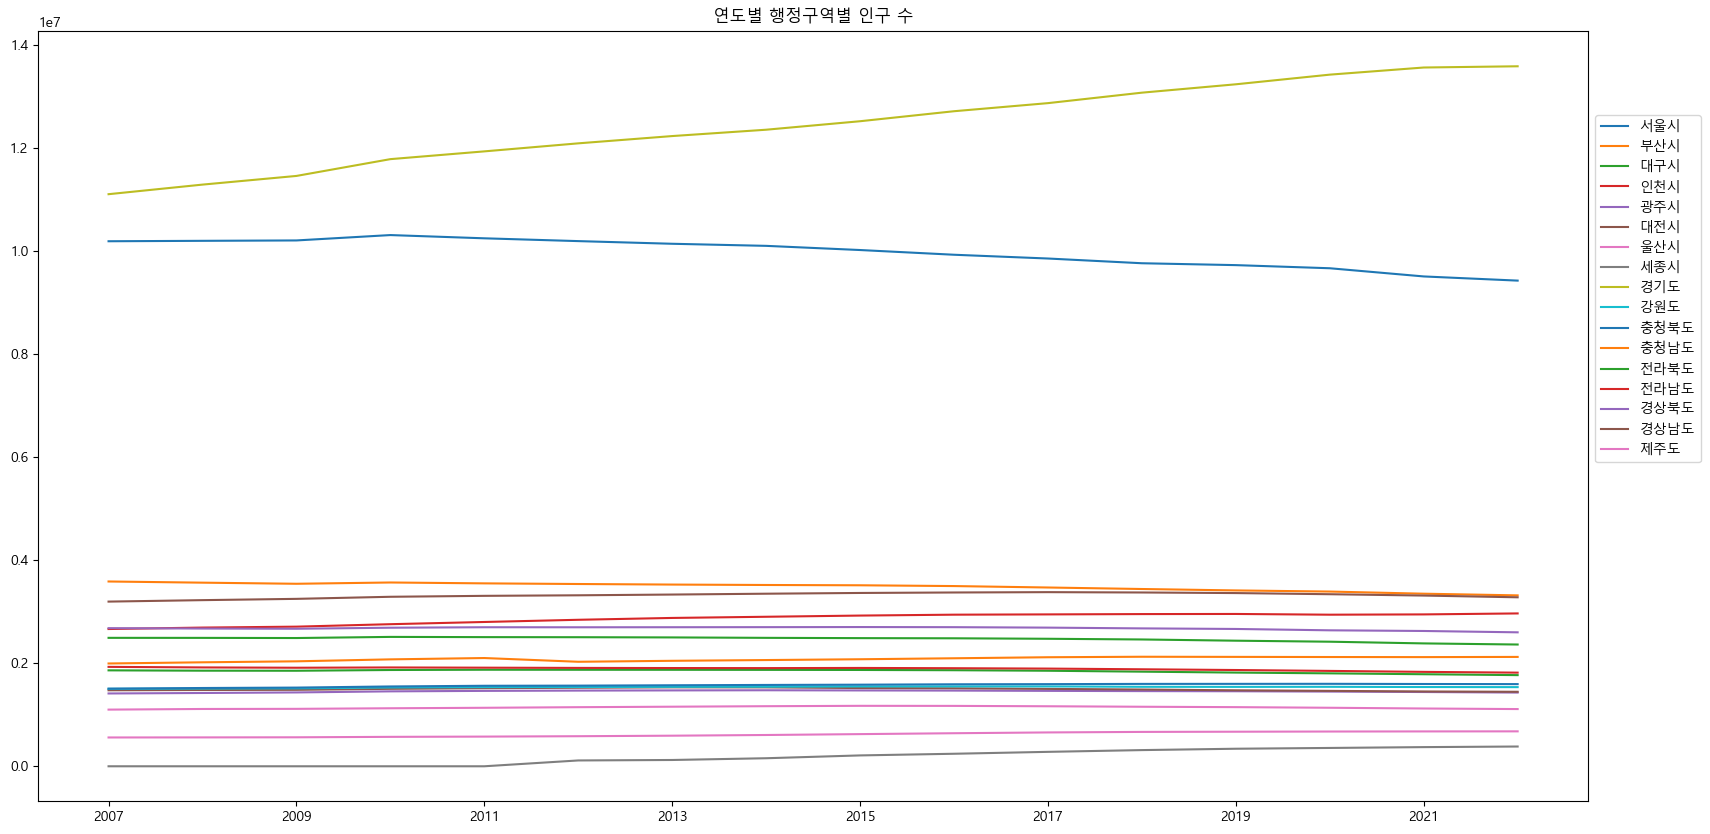

In [ ]:
# 꺾은 선 그래프 그리기
locpeople_df.plot(figsize=(20, 10))
plt.legend(loc='upper left', bbox_to_anchor = (1, 0.9))
plt.title('연도별 행정구역별 인구 수')
plt.show()

In [ ]:
# 연도별 인구 수 추출
locpeople_year = []
for i in range(15) :
    locpeople_year.append(locpeople_df.iloc[i:i+1])
 

In [ ]:
locpeople_year

[           서울시      부산시      대구시      인천시      광주시      대전시      울산시  세종시   
 2007  10192710  3587439  2493261  2664576  1413444  1475659  1099995    0  \
 
            경기도      강원도     충청북도     충청남도     전라북도     전라남도     경상북도     경상남도   
 2007  11106211  1503806  1506608  1995531  1862277  1929836  2681364  3196953  \
 
          제주도  
 2007  559258  ,
            서울시      부산시      대구시      인천시      광주시      대전시      울산시  세종시   
 2008  10200827  3564577  2492724  2692696  1422702  1480895  1112407    0  \
 
            경기도      강원도     충청북도     충청남도     전라북도     전라남도     경상북도     경상남도   
 2008  11292264  1508575  1519587  2018537  1855772  1919000  2673931  3225255  \
 
          제주도  
 2008  560618  ,
            서울시      부산시      대구시      인천시      광주시      대전시      울산시  세종시   
 2009  10208302  3543030  2489781  2710579  1433640  1484180  1114866    0  \
 
            경기도      강원도     충청북도     충청남도     전라북도     전라남도     경상북도     경상남도   
 2009  11460610  1512870  1527478  2037582  18

In [ ]:
locpeople_year[5]

,서울시,부산시,대구시,인천시,광주시,대전시,울산시,세종시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
2012,10195318,3538484,2505644,2843981,1469216,1524583,1147256,113117,12093299,1538630,1565628,2028777,1873341,1909618,2698353,3319314,583713


In [ ]:
# 대한민국 지도 데이터 불러오기
jsonfile = open('sprint2_base/TL_SCCO_CTPRVN.json', 'r', 
                encoding='utf8').read()
jsondata = json.loads(jsonfile)

In [ ]:
### 지도맵 그리기
people_map_2012 = folium.Map(
    ### 최초에 보여줄 지도위치(위/경도) 지정
    # - 최초에 중심점을 기준으로 지도가 그려짐
    location = [37.573050, 126.979189],

    ### 지도 스타일 지정하기
    # - 도시형 건물, 산림, 하천/도로 등 스타일 지정
    # openstreetmap : 도시형 건물 스타일(가장 일반적으로 사용됨)
    tiles = "openstreetmap",

    ### 최초에 화면에 보여질 스케일(zoom) 지정하기
    zoom_start = 6.5
)

people_map_2012

In [ ]:
folium.GeoJson(jsondata, name='시도').add_to(people_map_2012)
people_map_2012

In [ ]:
locpeople_year[5].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 2012 to 2012
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   서울시     1 non-null      int32
 1   부산시     1 non-null      int32
 2   대구시     1 non-null      int32
 3   인천시     1 non-null      int32
 4   광주시     1 non-null      int32
 5   대전시     1 non-null      int32
 6   울산시     1 non-null      int32
 7   세종시     1 non-null      int32
 8   경기도     1 non-null      int32
 9   강원도     1 non-null      int32
 10  충청북도    1 non-null      int32
 11  충청남도    1 non-null      int32
 12  전라북도    1 non-null      int32
 13  전라남도    1 non-null      int32
 14  경상북도    1 non-null      int32
 15  경상남도    1 non-null      int32
 16  제주도     1 non-null      int32
dtypes: int32(17)
memory usage: 76.0+ bytes


In [ ]:
locpeople_year[5]

,서울시,부산시,대구시,인천시,광주시,대전시,울산시,세종시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
2012,10195318,3538484,2505644,2843981,1469216,1524583,1147256,113117,12093299,1538630,1565628,2028777,1873341,1909618,2698353,3319314,583713


In [ ]:
locpeople_2012_df = locpeople_year[5].T

In [ ]:
locpeople_2012_df

,2012
서울시,10195318
부산시,3538484
대구시,2505644
인천시,2843981
광주시,1469216
대전시,1524583
울산시,1147256
세종시,113117
경기도,12093299
강원도,1538630


In [ ]:
locpeople_2012_df.columns

Index(['2012'], dtype='object')

In [ ]:
locpeople_2012_df.rename(columns={'2012':'인구 수'}, inplace=True)

In [ ]:
locpeople_2012_df

,인구 수
서울시,10195318
부산시,3538484
대구시,2505644
인천시,2843981
광주시,1469216
대전시,1524583
울산시,1147256
세종시,113117
경기도,12093299
강원도,1538630


In [ ]:
locpeople_2012_df.index

Index(['서울시', '부산시', '대구시', '인천시', '광주시', '대전시', '울산시', '세종시', '경기도', '강원도',
       '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주도'],
      dtype='object')

In [ ]:
locpeople_2012_df = locpeople_2012_df.reset_index()

In [ ]:
locpeople_2012_df

,index,인구 수
0,서울시,10195318
1,부산시,3538484
2,대구시,2505644
3,인천시,2843981
4,광주시,1469216
5,대전시,1524583
6,울산시,1147256
7,세종시,113117
8,경기도,12093299
9,강원도,1538630


In [ ]:
locpeople_2012_df = locpeople_2012_df.rename(columns={'index': '지역명'})

In [ ]:
locpeople_2012_df

,지역명,인구 수
0,서울시,10195318
1,부산시,3538484
2,대구시,2505644
3,인천시,2843981
4,광주시,1469216
5,대전시,1524583
6,울산시,1147256
7,세종시,113117
8,경기도,12093299
9,강원도,1538630


In [ ]:
# columns = ['서울시', '부산시', '대구시', '인천시', '광주시', '대전시', '울산시', '세종시', 
#            '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주도'], # DataFrame의 어떤 columns을 넣을지

In [ ]:
folium.Choropleth(
    geo_data = jsondata, # 경계선 좌표값이 담긴 데이터
    data = locpeople_2012_df, # Series or DataFrame 넣으면 된다
    columns = ['지역명','인구 수' ], # DataFrame의 어떤 columns을 넣을지
    key_on = 'feature.properties.CTP_KOR_NM', # id 값을 가져오겠다; feature.id : feature 붙여줘야 함 (folium의 정해진 형식)
    fill_color = 'YlOrRd',
    fill_opacity = 0.5, # 색 투명도
    line_opacity = 0.5, # 선 투명도
    legend_name = '2012년 인구 수', # 범례
    highlight=True,
).add_to(people_map_2012)
people_map_2012

In [ ]:
locpeople_2012_df

,지역명,인구 수
0,서울시,10195318
1,부산시,3538484
2,대구시,2505644
3,인천시,2843981
4,광주시,1469216
5,대전시,1524583
6,울산시,1147256
7,세종시,113117
8,경기도,12093299
9,강원도,1538630


In [ ]:
# 전력거래량을 기준으로 내림차순으로 정리
locpeople_2012_df = locpeople_2012_df.sort_values(by='인구 수')

In [ ]:
locpeople_2012_df

,지역명,인구 수
7,세종시,113117
16,제주도,583713
6,울산시,1147256
4,광주시,1469216
5,대전시,1524583
9,강원도,1538630
10,충청북도,1565628
12,전라북도,1873341
13,전라남도,1909618
11,충청남도,2028777


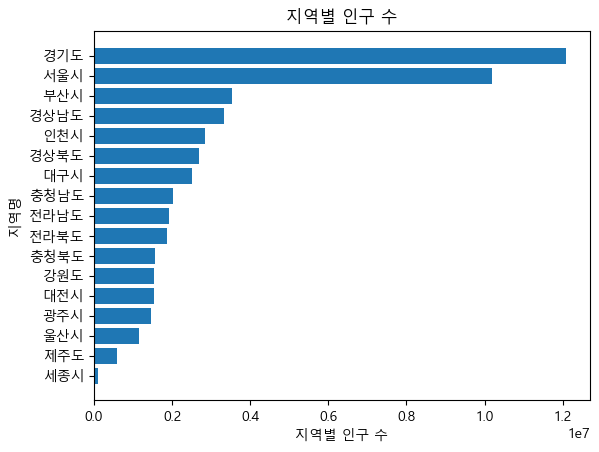

<Figure size 2000x2000 with 0 Axes>

In [ ]:
# 지역별 인구 수 내림차순으로 바그래프로 시각화
# 데이터 준비
x = locpeople_2012_df['지역명']
y = locpeople_2012_df['인구 수']

# 바 그래프 그리기
plt.barh(x, y)

# 그래프 제목 설정
plt.title('지역별 인구 수')

# x축, y축 라벨 설정
plt.xlabel('지역별 인구 수')
plt.ylabel('지역명')

# 그래프 크기 조정
plt.figure(figsize=(20, 20))

# 그래프 출력
plt.show()
